In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

True


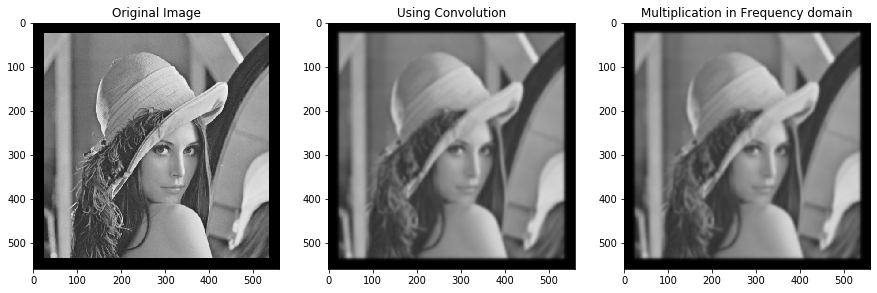

In [2]:
f = cv2.imread('./res/lena.jpg', 0)
h = cv2.getGaussianKernel(25, 3)
h = h@h.T

r, c = h.shape
f = np.asarray(f, dtype = float)

f = np.pad(f, ((r-1, r-1), (c-1, c-1)), 'constant', constant_values=(0, 0))

out1 = cv2.filter2D(f, -1, h)
F = np.fft.fft2(f)
H = np.fft.fft2(h, F.shape)
out2 = (np.abs(np.fft.ifft2(np.multiply(F, H))))
out2 = np.roll(out2, (-((h.shape[0] - 1)//2), -((h.shape[1] - 1)//2)), axis=(0, 1))

print(np.allclose(out1, out2))

arr = plt.subplots(1,3,figsize =(15,15))[1]
arr[0].imshow(np.uint8(f), 'gray')
arr[0].set_title("Original Image")
arr[1].imshow(np.abs(out1), 'gray', vmin= 0, vmax = 255)
arr[1].set_title("Using Convolution")
arr[2].imshow(np.abs(out2), 'gray', vmin= 0, vmax = 255)
arr[2].set_title("Multiplication in Frequency domain")

plt.show()

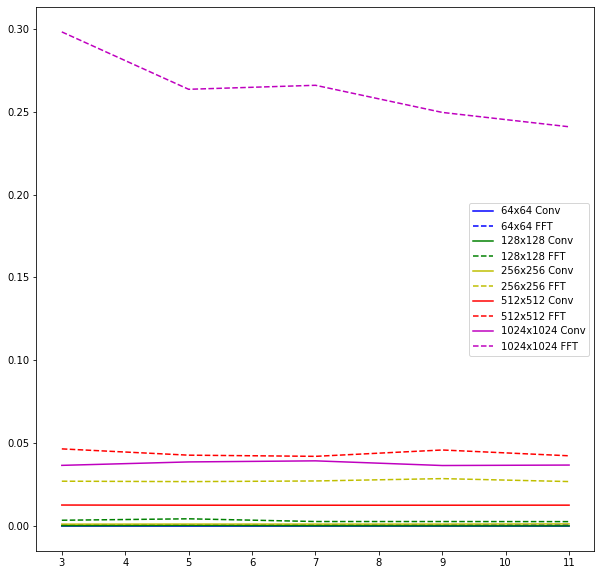

In [3]:
f = cv2.imread('./res/lena.jpg', 0)
f = np.asarray(f, dtype = float)

sz = [64, 128, 256, 512, 1024]
k = [3, 5, 7, 9, 11]
plt.figure(figsize = (10,10))
color = ['b', 'g', 'y', 'r', 'm']

for i in range(len(sz)):
    tm1 = []
    tm2 = []
    h = np.random.randint(10, size=(k[i],k[i]))
    im = cv2.resize(f, (sz[i], sz[i]))
    im = np.pad(im, ((k[i]-1,k[i]-1), (k[i]-1,k[i]-1)), 'constant', constant_values=(0, 0))
    for j in k:
        st = time.time()
        out = cv2.filter2D(im, -1, h)
        tm1.append(time.time() - st)
        st = time.time()
        F = np.fft.fft2(im)
        H = np.fft.fft2(h, [F.shape[0], F.shape[1]])
        out2 = np.abs(np.fft.ifft2(np.multiply(F, H)))
        tm2.append(time.time()-st)
    plt.plot(k,tm1, color = color[i], label = str(sz[i]) + 'x' + str(sz[i]) + ' Conv')
    plt.plot(k,tm2, color = color[i], linestyle='dashed', label = str(sz[i]) + 'x' + str(sz[i]) + ' FFT')

plt.legend()
plt.show()

## Observations:

- We can see that as image size increases, the time taken increases
- Changing the size of kernel, doesn't affect the change in time
- Time taken by FFT is more than the time taken by Convolution.